In [1]:
import numpy as np

# 余弦推程运动子函数
def Yuxian_tuicheng(delta01, h, omega):
    # 输入参数：delta01-推程运动角，h-推程，omega-凸轮角速度
    # 输出参数：s1-推杆位移，v1-推杆速度，a1-推杆加速度，delta_1-凸轮转动角度
    delta_1 = np.linspace(0, delta01, int(np.round(delta01)))
    s1 = h * (1 - np.cos(np.pi * delta_1 / delta01)) / 2
    v1 = np.pi * h * omega * np.sin(np.pi * delta_1 / delta01) / (2 * delta01 * np.pi / 180)
    a1 = (np.pi ** 2) * h * (omega ** 2) * np.cos(np.pi * delta_1 / delta01) / (2 * (delta01 * np.pi / 180) ** 2)
    return s1, v1, a1, delta_1

# 正弦推程运动子函数
def Zhengxian_tuicheng(delta01, h, omega):
    # 输入参数：delta01-推程运动角，h-推程，omega-凸轮角速度
    # 输出参数：s1-推杆位移，v1-推杆速度，a1-推杆加速度，delta_1-凸轮转动角度
    delta_1 = np.linspace(0, delta01, int(np.round(delta01)))
    angle = 2 * np.pi * delta_1 / delta01
    s1 = h * (delta_1 / delta01 - np.sin(angle) / (2 * np.pi))
    v1 = omega * h * (1 - np.cos(angle)) / (delta01 * np.pi / 180)
    a1 = 2 * np.pi * h * (omega ** 2) * np.sin(angle) / (delta01 * np.pi / 180) ** 2
    return s1, v1, a1, delta_1

# 等速回程运动子函数
def Dengsu_huicheng(delta01, deltax01, delta02, h, omega):
    # 输入参数：delta01-推程运动角，deltax01-远休止角，delta02-回程运动角，h-回程，omega-凸轮角速度
    # 输出参数：s3-推杆位移，v3-推杆速度，a3-推杆加速度，delta_3-凸轮转角
    delta_3 = np.linspace(delta01 + deltax01 + 1, delta01 + deltax01 + delta02, int(np.round(delta02)))
    s3 = h * (1 - (delta_3 - (delta01 + deltax01)) / delta02)
    v3 = -h * omega / (delta02 * np.pi / 180) * np.ones_like(delta_3)
    a3 = np.zeros_like(delta_3)
    return s3, v3, a3, delta_3

# 等加速-等减速回推程运动子函数
def Dengjia_Dengjian_huicheng(delta01, deltax01, delta02, h, omega):
    # 输入参数：delta01-推程运动角，deltax01-远休止角，delta02-回程运动角，h-推程，omega-凸轮角速度
    # 输出参数：s3-推杆位移，v3-推杆速度，a3-推杆加速度，delta_3-凸轮转动角度
    delta1 = np.linspace(delta01 + deltax01 + 1, delta01 + deltax01 + delta02 / 2, int(np.round(delta02 / 2)))
    s01 = h - 2 * h * (delta1 - delta01 - deltax01) ** 2 / delta02 ** 2
    v01 = -(4 * h * omega * (delta1 - delta01 - deltax01) * np.pi / 180) / (delta02 * np.pi / 180) ** 2
    a01 = -4 * h * (omega ** 2) / (delta02 * np.pi / 180) ** 2 * np.ones_like(delta1)
    
    delta2 = np.linspace(delta01 + deltax01 + delta02 / 2 + 1, delta01 + deltax01 + delta02, int(np.round(delta02 / 2)))
    s02 = 2 * h * ((delta01 + deltax01 + delta02) - delta2) ** 2 / delta02 ** 2
    v02 = -4 * h * omega * (delta01 + deltax01 + delta02 - delta2) * np.pi / 180 / (delta02 * np.pi / 180) ** 2
    a02 = 4 * h * (omega ** 2) / (delta02 * np.pi / 180) ** 2 * np.ones_like(delta2)
    
    s3 = np.concatenate((s01, s02))
    v3 = np.concatenate((v01, v02))
    a3 = np.concatenate((a01, a02))
    delta_3 = np.concatenate((delta1, delta2))
    return s3, v3, a3, delta_3

# 余弦回程运动子函数
def Yuxian_huicheng(delta01, deltax01, delta02, h, omega):
    # 输入参数：delta01-推程运动角，deltax01-远休止角，delta02-回程运动角，h-推程，omega-凸轮角速度
    # 输出参数：s3-推杆位移，v3-推杆速度，a3-推杆加速度，delta_3-凸轮转动角度
    delta_3 = np.linspace(delta01 + deltax01 + 1, delta01 + deltax01 + delta02, int(np.round(delta02)))
    angle = np.pi * (delta_3 - (delta01 + deltax01)) / delta02
    s3 = h * (1 + np.cos(angle)) / 2
    v3 = -np.pi * h * omega * np.sin(angle) / (2 * delta02 * np.pi / 180)
    a3 = -(np.pi ** 2) * h * (omega ** 2) * np.cos(angle) / (2 * (delta02 * np.pi / 180) ** 2)
    return s3, v3, a3, delta_3

# 正弦回程运动子函数
def Zhengxian_huicheng(delta01, deltax01, delta02, h, omega):
    # 输入参数：delta01-推程运动角，deltax01-远休止角，delta02-回程运动角，h-回程，omega-凸轮角速度
    # 输出参数：s3-推杆位移，v3-推杆速度，a3-推杆加速度，delta_3-凸轮转动角度
    delta_3 = np.linspace(delta01 + deltax01 + 1, delta01 + deltax01 + delta02, int(np.round(delta02)))
    angle = 2 * np.pi * (delta_3 - (delta01 + deltax01)) / delta02
    s3 = h * (1 - (delta_3 - (delta01 + deltax01)) / delta02 + np.sin(angle) / (2 * np.pi))
    v3 = h * omega * (np.cos(angle) - 1) / (delta02 * np.pi / 180)
    a3 = -2 * np.pi * h * (omega ** 2) * np.sin(angle) / (delta02 * np.pi / 180) ** 2
    return s3, v3, a3, delta_3


In [2]:
def xzZhengxian_tuicheng(delta01, h, omega):
    # 输入参数：delta01-推程运动角，h-推程，omega-凸轮角速度
    # 输出参数：s1-推杆位移，v1-推杆速度，a1-推杆加速度，delta_1-凸轮转动角度
    jianget=delta01/omega
    from univcam import zxzxqx
    
    chushit=0/omega
    msj=delta01/omega
    jgsj=msj-chushit
    df=zxzxqx(li_T_pm=[0,0.125,0.1250,0.5,0.5,0.875,0.875,1],li_S_pm=[0,h],li_V_pm=[0,0],div=200 ,m=1 )
    df['TT']=df['T']*jgsj+chushit
    df['jd']=df['TT']*omega
    delta_1=df['jd'].to_numpy()
    s1=df['S'].to_numpy()
    v1=df['V'].to_numpy()
    a1=df['A'].to_numpy()
    J1=df['J'].to_numpy()
    return s1, v1, a1, delta_1
# 正弦回程运动子函数
def xzZhengxian_huicheng(delta01, deltax01, delta02, h, omega):
    # 输入参数：delta01-推程运动角，deltax01-远休止角，delta02-回程运动角，h-回程，omega-凸轮角速度
    # 输出参数：s3-推杆位移，v3-推杆速度，a3-推杆加速度，delta_3-凸轮转动角度
    jianget=delta01/omega
    from univcam import zxzxqx
    chushit=(delta01 + deltax01 + 1)/omega
    msj=(delta01 + deltax01 + delta02)/omega
    jgsj=msj-chushit
    df=zxzxqx(li_T_pm=[0,0.125,0.1250,0.5,0.5,0.875,0.875,1],li_S_pm=[h,0],li_V_pm=[0,0],div=200 ,m=1 )
    df['TT']=df['T']*jgsj+chushit
    df['jd']=df['TT']*omega
    delta_3=df['jd'].to_numpy()
    s3=df['S'].to_numpy()
    v3=df['V'].to_numpy()
    a3=df['A'].to_numpy()
    j3=df['J'].to_numpy()
    return s3, v3, a3, delta_3

In [3]:
import numpy as np

# 远休止子函数
def Yuanxiu(delta01, deltax01, h):
    """
    输入参数：
    delta01 - 推程运动角
    deltax01 - 远休止角
    h - 推程
    
    输出参数：
    s2 - 推杆位移
    v2 - 推杆速度
    a2 - 推杆加速度
    delta_2 - 凸轮转角
    """
    delta_2 = np.linspace(delta01, delta01 + deltax01, int(np.round(deltax01)))
    s2 = h * np.ones(len(delta_2))
    v2 = np.zeros(len(delta_2))
    a2 = np.zeros(len(delta_2))
    return s2, v2, a2, delta_2

# 近休止子函数
def Jinxiu(delta01, deltax01, delta02, deltax02):
    """
    输入参数：
    delta01 - 推程运动角
    deltax01 - 远休止角
    delta02 - 回程运动角
    deltax02 - 近休止角
    
    输出参数：
    s4 - 推杆位移
    v4 - 推杆速度
    a4 - 推杆加速度
    delta_4 - 凸轮转角
    """
    delta_4 = np.linspace(delta01 + deltax01 + delta02, delta01 + deltax01 + delta02 + deltax02, int(np.round(deltax02)))
    s4 = np.zeros(len(delta_4))
    v4 = np.zeros(len(delta_4))
    a4 = np.zeros(len(delta_4))
    return s4, v4, a4, delta_4

# 示例用法
if __name__ == "__main__":
    # 示例参数
    delta01 = 0
    deltax01 = 2
    h = 5
    delta02 = 3
    deltax02 = 1
    
    # 调用函数
    s2, v2, a2, delta_2 = Yuanxiu(delta01, deltax01, h)
    s4, v4, a4, delta_4 = Jinxiu(delta01, deltax01, delta02, deltax02)
    
    # 打印结果
    print("Yuanxiu 结果:")
    print("s2:", s2)
    print("v2:", v2)
    print("a2:", a2)
    print("delta_2:", delta_2)
    
    print("\nJinxiu 结果:")
    print("s4:", s4)
    print("v4:", v4)
    print("a4:", a4)
    print("delta_4:", delta_4)


Yuanxiu 结果:
s2: [5. 5.]
v2: [0. 0.]
a2: [0. 0.]
delta_2: [0. 2.]

Jinxiu 结果:
s4: [0.]
v4: [0.]
a4: [0.]
delta_4: [5.]


In [4]:
import numpy as np

def cam_zhidong(r0, h, delta01, deltax01, delta02, deltax02, e, rt, n, M, index1, index3, N1, N2):
    # 输入参数说明略...
    
    omega = 2 * np.pi * n / 60
    
    # 推程运动规律
    if index1 == 11:
        s1, v1, a1, delta_1 = Dengsu_tuicheng(delta01, h, omega)
    elif index1 == 12:
        s1, v1, a1, delta_1 = Dengjia_Dengjian_tuicheng(delta01, h, omega)
    elif index1 == 13:
        s1, v1, a1, delta_1 = Yuxian_tuicheng(delta01, h, omega)
    elif index1 == 14:
        s1, v1, a1, delta_1 = Zhengxian_tuicheng(delta01, h, omega)
    elif index1 == 15:
        s1, v1, a1, delta_1 = xzZhengxian_tuicheng(delta01, h, omega)
    
    # 回程运动规律
    if index3 == 31:
        s3, v3, a3, delta_3 = Dengsu_huicheng(delta01, deltax01, delta02, h, omega)
    elif index3 == 32:
        s3, v3, a3, delta_3 = Dengjia_Dengjian_huicheng(delta01, deltax01, delta02, h, omega)
    elif index3 == 33:
        s3, v3, a3, delta_3 = Yuxian_huicheng(delta01, deltax01, delta02, h, omega)
    elif index3 == 34:
        s3, v3, a3, delta_3 = Zhengxian_huicheng(delta01, deltax01, delta02, h, omega)
    elif index3 == 35:
        s3, v3, a3, delta_3 = xzZhengxian_huicheng(delta01, deltax01, delta02, h, omega)
    
    s2, v2, a2, delta_2 = Yuanxiu(delta01, deltax01, h)
    s4, v4, a4, delta_4 = Jinxiu(delta01, deltax01, delta02, deltax02)
    
    delta = np.concatenate((delta_1, delta_2, delta_3, delta_4))
    s = np.concatenate((s1, s2, s3, s4))
    v = np.concatenate((v1, v2, v3, v4))
    a = np.concatenate((a1, a2, a3, a4))
    
    # 计算滚子直动从动件盘形凸轮机构理论轮廓坐标
    s0 = np.sqrt(r0**2 + e**2)
    x0 = (s0 + s) * np.sin(N1 * delta * np.pi / 180) + N2 * e * np.cos(N1 * delta * np.pi / 180)
    y0 = (s0 + s) * np.cos(N1 * delta * np.pi / 180) - N2 * e * np.sin(N1 * delta * np.pi / 180)
    
    # 计算滚子直动从动件盘形凸轮机构实际轮廓坐标
    dx_delta = (v / omega - N1 * N2 * e) * np.sin(N1 * delta * np.pi / 180) + N1 * (s0 + s) * np.cos(N1 * delta * np.pi / 180)
    dy_delta = (v / omega - N1 * N2 * e) * np.cos(N1 * delta * np.pi / 180) - N1 * (s0 + s) * np.sin(N1 * delta * np.pi / 180)
    
    if rt == 0:
        x = x0
        y = y0
    else:
        A = np.sqrt(dx_delta**2 + dy_delta**2)
        x = x0 - N1 * M * rt * dy_delta / A
        y = y0 + N1 * M * rt * dx_delta / A
    
    # 计算压力角、推程压力角
    rs1 = s0 + s1
    angle1 = np.abs(np.arctan((v1 / omega - N1 * N2 * e) / rs1))
    
    # 回程压力角
    rs2 = s0 + s3
    angle2 = np.abs(np.arctan((v3 / omega - N1 * N2 * e) / rs2))
    
    # 计算凸轮轮廓曲率半径
    ddx_delta = (a / omega**2 - s0 - s) * np.sin(N1 * delta * np.pi / 180) + (2 * v / omega - N1 * N2 * e) * N1 * np.cos(N1 * delta * np.pi / 180)
    ddy_delta = (a / omega**2 - s0 - s) * np.cos(N1 * delta * np.pi / 180) - (2 * v / omega - N1 * N2 * e) * N1 * np.sin(N1 * delta * np.pi / 180)
    A = (dx_delta**2 + dy_delta**2)**1.5
    B = dx_delta * ddy_delta - dy_delta * ddx_delta
    rou = A / B
    rou0 = np.abs(rou + M * rt)
    
    return delta, s, v, a, x0, y0, x, y, angle1, angle2, rou0

# 需要注意的是，上述函数调用的一些子函数（例如Dengsu_tuicheng, Dengjia_Dengjian_tuicheng等）
# 需要在Python中相应实现，这里假设这些子函数已经定义并可以使用。


In [5]:
#输入参数：
#r0-基园半径，h-行程，
#delta01-推程运动角，deltax01-远休止角，delta02-回程运动角，deltax02-近休止角
#e-偏心距，rt-滚子半径，n-凸轮转速（r/min）
#index1-推程运动规律标号；11-等速运动规律；12-等加速等减速运动规律；
#                       13-余弦加速度运动规律；14-正弦加速度运动规律；
#index3-回程运动规律标号；31-等速运动规律；32-等加速等减速运动规律；
#                       33-余弦加速度运动规律；34-正弦加速度运动规律；
#M的取值-当用于计算内等距曲线时，M=-1；当用于计算外等距曲线时，M=1；
# N1的取值-凸轮逆时针转动，N1=1；反之，N1=-1；
#N2的取值-推杆偏距e位于y轴的右侧，N2=1；反之，N2=-1；
r0= 360
h= 80
delta01=122
deltax01= 58
delta02=122
deltax02= 58
e=0
rt=50
n= 10
M=-1
index1=15
index3=35
N1= 1
N2=2
zhi=cam_zhidong(r0, h, delta01, deltax01, delta02, deltax02, e, rt, n, M, index1, index3, N1, N2)
#delta-凸轮转角，s-推杆位移，v-推杆速度， a-推杆角速度，angle1-推程压力角，angle2-回程压力角
#rou0-凸轮轮廓曲率半径，（x0,y0）-凸轮机构理论轮廓坐标，（x,y）-凸轮机构实际轮廓坐标


time step:0.005,divid number:200
section 3 0.12500000000000003
section 3 0.13000000000000003
section 3 0.13500000000000004
section 3 0.14000000000000004
section 3 0.14500000000000005
section 3 0.15000000000000005
section 3 0.15500000000000005
section 3 0.16000000000000006
section 3 0.16500000000000006
section 3 0.17000000000000007
section 3 0.17500000000000007
section 3 0.18000000000000008
section 3 0.18500000000000008
section 3 0.19000000000000009
section 3 0.1950000000000001
section 3 0.2000000000000001
section 3 0.2050000000000001
section 3 0.2100000000000001
section 3 0.2150000000000001
section 3 0.2200000000000001
section 3 0.22500000000000012
section 3 0.23000000000000012
section 3 0.23500000000000013
section 3 0.24000000000000013
section 3 0.24500000000000013
section 3 0.2500000000000001
section 3 0.2550000000000001
section 3 0.2600000000000001
section 3 0.2650000000000001
section 3 0.27000000000000013
section 3 0.27500000000000013
section 3 0.28000000000000014
section 3 0.28500

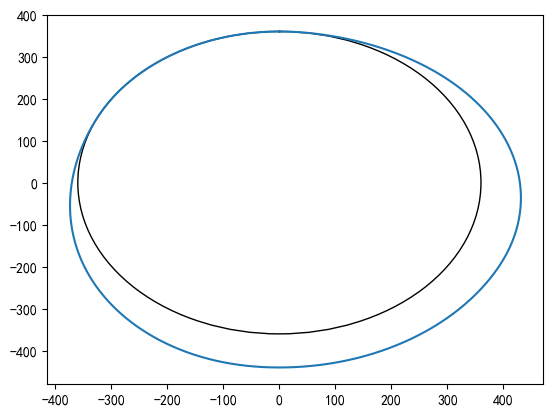

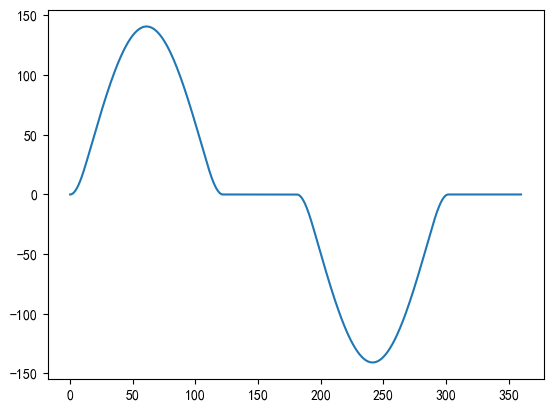

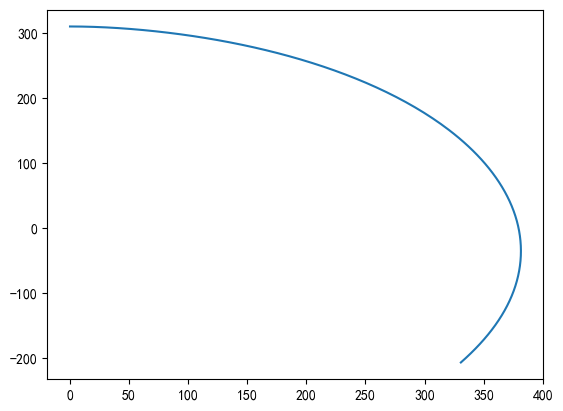

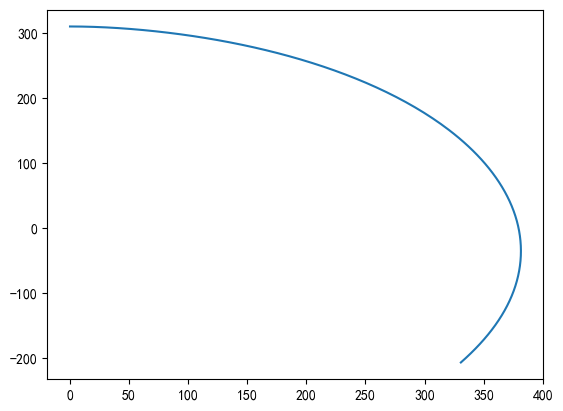

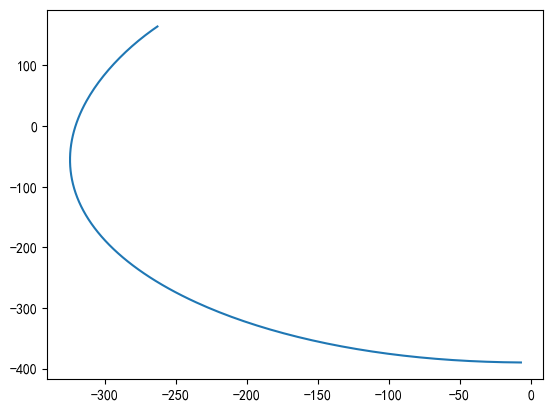

In [55]:
import pandas as pd
shuju=pd.DataFrame()
shuju['凸轮转角']=zhi[0]
shuju['凸轮x']=zhi[6]
shuju['凸轮y']=zhi[7]
shuju.to_csv(r'E:\最新参考\univcam-master\shuju.csv', sep=',', index=False)
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from scipy.optimize import root,fsolve
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
from matplotlib.patches import Circle
fig, ax = plt.subplots()
#ax.plot(zhi[6],zhi[7])
ax.plot(zhi[4],zhi[5])
cir=Circle((0,0),r0,fill=False)
ax.add_patch(cir)
fig, ax = plt.subplots()
ax.plot(zhi[0],zhi[2])
#delta-凸轮转角，s-推杆位移，v-推杆速度， a-推杆角速度，angle1-推程压力角，angle2-回程压力角
#rou0-凸轮轮廓曲率半径，（x0,y0）-凸轮机构理论轮廓坐标，（x,y）-凸轮机构实际轮廓坐标
df=shuju
start_angle=0
end_angle=delta01
masked_df = df[(df['凸轮转角'] >= start_angle) & (df['凸轮转角'] <= end_angle)]
start_angle2=delta01 + deltax01 + 1
end_angle2=delta01 + deltax01 + delta02
masked_df2 = df[(df['凸轮转角'] >= start_angle2) & (df['凸轮转角'] <= end_angle2)]
result = masked_df
result2 = masked_df2
xx =np.array(result['凸轮x'])
yy =np.array(result['凸轮y'])
xxx =np.array(result2['凸轮x'])
yyy =np.array(result2['凸轮y'])
fig, ax = plt.subplots()
ax.plot(xx,yy)
# 但上面的方法并不是真正的间隔交叉，所以我们需要另一种方法
# 方法2：通过索引和数组拼接实现真正的间隔交叉
x=xx
y=yy
x1=xxx
y1=yyy
fig, ax = plt.subplots()
ax.plot(x,y)
fig, ax = plt.subplots()
ax.plot(x1,y1)
def zhuanhuan(x,y):
    result=[]
    for i in range(len(x)):
        result.append(x[i]/1000)
        result.append(y[i]/1000)
        result.append(0)
    #result=result.to_list()
    return result
result=zhuanhuan(x,y)
result2=zhuanhuan(x1,y1)
#print(result)

In [58]:
import win32com.client
import pythoncom
# 获取上一级目录的上一级目录
import os


path=os.getcwd()
print(path)
path=path+'\凸轮.SLDPRT'
def main():
    sldver=2022
    swApp=win32com.client.Dispatch(f'SldWorks.Application.{sldver-1992}')
    swApp.CommandInProgress =True
    swApp.Visible =True
    Errors = win32com.client.VARIANT(pythoncom.VT_BYREF | pythoncom.VT_I4, -1)
    Warnings = win32com.client.VARIANT(pythoncom.VT_BYREF | pythoncom.VT_I4, -1)
    Part=swApp.OpenDoc6(path, 1, 1, "", Errors, Warnings)
    #Part.GetMassProperties2(-1)
    # 注意此处当前文档是工程图文档
    swModel = swApp.ActiveDoc
    Nothing=win32com.client.VARIANT(9,None)
    boolstatus = swModel.Extension.SelectByID2("上视基准面", "PLANE", 0, 0, 0, False, 0, Nothing, 0)
    swModel.SketchManager.InsertSketch(True)
    swModel.ClearSelection2(True)
    status=win32com.client.VARIANT(16396,None)
    # 样条线的2D数据点
    points=result
    #points=(0.0006604515510698389,0.111111,0,0.1,0.1,0,0.3,0.5,0,0.8,-0.2,0)
    #points=(0.0006604515510698389,0.111111,0.0,0.1,0.1,0,)
    #points=(0.0, 0.31, 0.0006604515510698389, 0.3099992973846508, 0.03245885150864115, 0.30840505506783317,)
    print(type(points))
    pointArray=win32com.client.VARIANT(pythoncom.VT_ARRAY | pythoncom.VT_R8,points)
    skSegment = swModel.SketchManager.CreateSpline3(pointArray,Nothing,Nothing,True,status)
    points1=result2
    #points=(0.0006604515510698389,0.111111,0,0.1,0.1,0,0.3,0.5,0,0.8,-0.2,0)
    #points=(0.0006604515510698389,0.111111,0.0,0.1,0.1,0,)
    #points=(0.0, 0.31, 0.0006604515510698389, 0.3099992973846508, 0.03245885150864115, 0.30840505506783317,)
    print(type(points))
    pointArray1=win32com.client.VARIANT(pythoncom.VT_ARRAY | pythoncom.VT_R8,points1)
    skSegment = swModel.SketchManager.CreateSpline3(pointArray1,Nothing,Nothing,True,status)
    #skSegment = swModel.SketchManager.CreateSpline((pointArray))
    #swModel.SketchManager.InsertSketch(True)
    ling=win32com.client.VARIANT(pythoncom.VT_ARRAY | pythoncom.VT_R8,0.0)
    db360=win32com.client.VARIANT(pythoncom.VT_ARRAY | pythoncom.VT_R8,360)
    db304=win32com.client.VARIANT(pythoncom.VT_ARRAY | pythoncom.VT_R8,-305.29731462)
    db190=win32com.client.VARIANT(pythoncom.VT_ARRAY | pythoncom.VT_R8,-190.77093512)
    pointArray1=win32com.client.VARIANT(pythoncom.VT_ARRAY | pythoncom.VT_R8,points1)
    #skSegment = swModel.SketchManager.CreateTangentArc(ling, ling, db360, db304, ling,db190,0)
    # 假设我们有一个起始点和终点
    swModel.ClearSelection2(True)
    # 创建切线弧
    sk_tangent_arc = swModel.SketchManager.CreateTangentArc(-0.30529731462,0.0,-0.19077093512,-0.0,0.0,-0.360,1)
    swModel.ClearSelection2(True)
    # 结束草图
    swModel.SketchManager.InsertSketch(True)

if __name__ == '__main__':
    main()


E:\最新参考\univcam-master
<class 'list'>
<class 'list'>


In [57]:
import win32com.client
import pythoncom
# 获取上一级目录的上一级目录
import os


path=os.getcwd()
print(path)
path=path+'\凸轮.SLDPRT'
def main():
    sldver=2022
    swApp=win32com.client.Dispatch(f'SldWorks.Application.{sldver-1992}')
    swApp.CommandInProgress =True
    swApp.Visible =True
    Errors = win32com.client.VARIANT(pythoncom.VT_BYREF | pythoncom.VT_I4, -1)
    Warnings = win32com.client.VARIANT(pythoncom.VT_BYREF | pythoncom.VT_I4, -1)
    Part=swApp.OpenDoc6(path, 1, 1, "", Errors, Warnings)
    #Part.GetMassProperties2(-1)
    # 注意此处当前文档是工程图文档
    swModel = swApp.ActiveDoc
    Nothing=win32com.client.VARIANT(9,None)
    boolstatus = swModel.Extension.SelectByID2("上视基准面", "PLANE", 0, 0, 0, False, 0, Nothing, 0)
    swModel.SketchManager.InsertSketch(True)
    swModel.ClearSelection2(True)
    

    '''# 创建一条线段
    sk_segment =swModel.SketchManager.CreateLine(-0.060928, 0.0, 0.0, 0.06209, 0.002933, 0.0)
    swModel.ClearSelection2(True)

    # 创建切线弧
    sk_tangent_arc = swModel.SketchManager.CreateTangentArc(0.06209, 0.0, 0.0, 0.020571, -0.021799, 0.0, 1)'''
    
    swModel.ClearSelection2(True)
    # 结束草图
    swModel.SketchManager.InsertSketch(True)

if __name__ == "__main__":
    main()


E:\最新参考\univcam-master


In [120]:
import numpy as np

# 假设x和y是两个已经存在的NumPy数组
x = np.array([1, 2, 3, 4, 5])
y = np.array([6, 7, 8, 9, 10])

# 但上面的方法并不是真正的间隔交叉，所以我们需要另一种方法
# 方法2：通过索引和数组拼接实现真正的间隔交叉
result = np.empty(x.size + y.size, dtype=x.dtype)
result[0::2] = x
result[1::2] = y

print(result)


[ 1  6  2  7  3  8  4  9  5 10]


In [159]:
import pandas as pd
import numpy as np

def extract_rows_from_dataframe(df, start_rows, end_rows, middle_rows):
    # 获取DataFrame的总行数
    total_rows = len(df)
    
    # 检查参数的有效性
    if start_rows < 0 or end_rows < 0 or middle_rows < 0:
        raise ValueError("The number of rows to extract must be non-negative.")
    if start_rows + end_rows >= total_rows:
        raise ValueError("The sum of start_rows and end_rows must be less than the total number of rows.")
    
    # 提取开头的行数
    start_df = df.iloc[:start_rows]
    
    # 提取结尾的行数
    end_df = df.iloc[-end_rows:]
    
    # 提取中间均匀的行数
    remaining_rows = total_rows - start_rows - end_rows
    if middle_rows > remaining_rows:
        raise ValueError("The number of middle_rows exceeds the available rows between start and end.")
    step = remaining_rows // (middle_rows + 1)
    if step == 0:
        step = 1
    middle_indices = np.arange(start_rows, total_rows - end_rows, step)[:middle_rows]
    middle_df = df.iloc[middle_indices]
    result_df = pd.concat([start_df, middle_df, end_df])
    return result_df

# 示例使用
data = {
    '凸轮转角': range(20),
    '凸轮x': range(20),
    '凸轮y': range(20, 40)
}
df = pd.DataFrame(data)
print(df)
# 从DataFrame中取出开头2行，结尾2行，中间均匀取出5行
result = extract_rows_from_dataframe(df, start_rows=1, end_rows=1, middle_rows=5)
print(result)


    凸轮转角  凸轮x  凸轮y
0      0    0   20
1      1    1   21
2      2    2   22
3      3    3   23
4      4    4   24
5      5    5   25
6      6    6   26
7      7    7   27
8      8    8   28
9      9    9   29
10    10   10   30
11    11   11   31
12    12   12   32
13    13   13   33
14    14   14   34
15    15   15   35
16    16   16   36
17    17   17   37
18    18   18   38
19    19   19   39
    凸轮转角  凸轮x  凸轮y
0      0    0   20
1      1    1   21
4      4    4   24
7      7    7   27
10    10   10   30
13    13   13   33
19    19   19   39


In [60]:
np.linspace(0,5,6)

array([0., 1., 2., 3., 4., 5.])